Import necessary modules

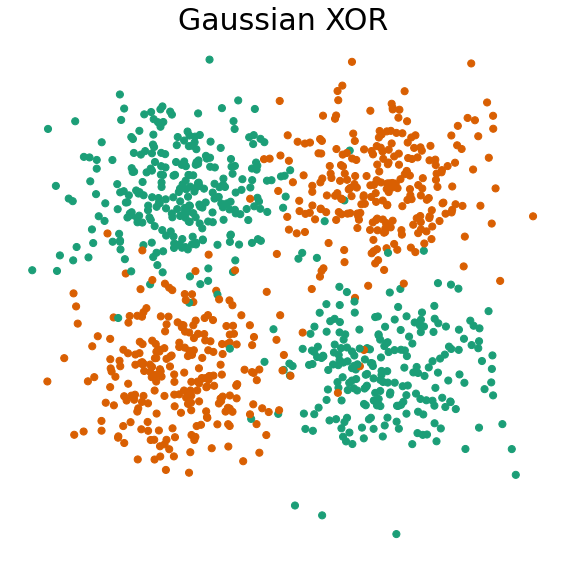

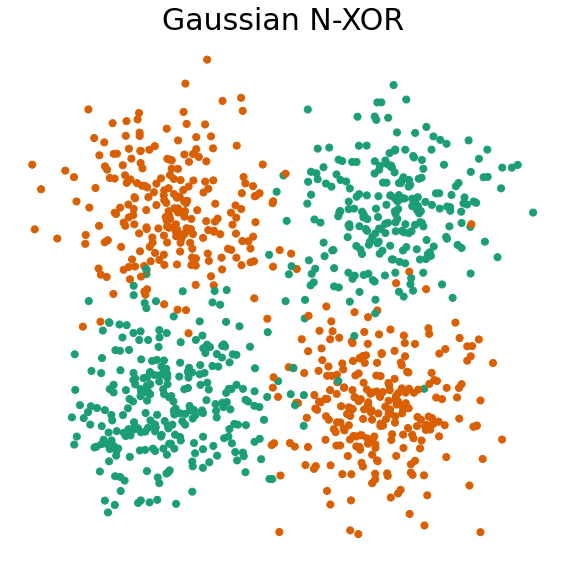

In [4]:
import numpy as np

import functions.xor_nxor_functions as fn
from proglearn.sims import generate_gaussian_parity

Generate Gaussian XOR and NXOR Data

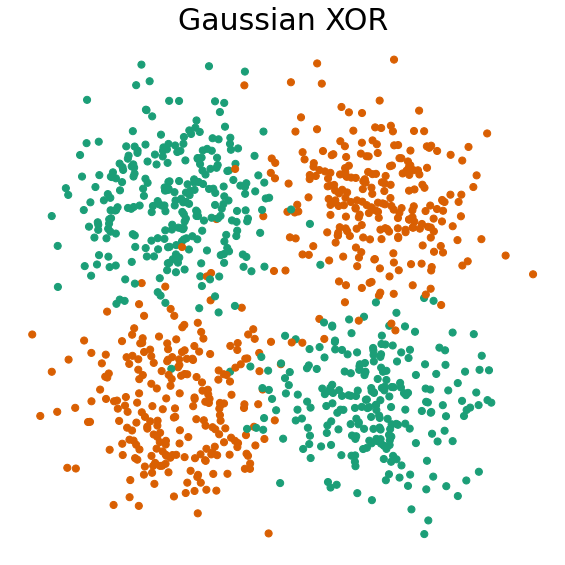

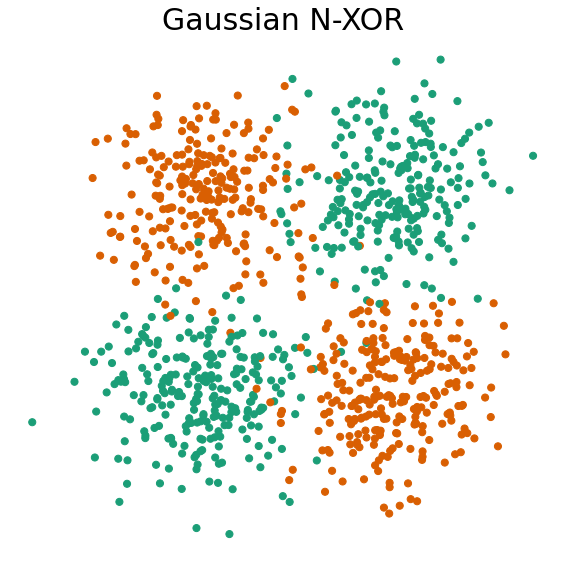

In [5]:
X_xor, y_xor = generate_gaussian_parity(1000)
X_nxor, y_nxor = generate_gaussian_parity(1000, angle_params=np.pi/2)

X, Y = generate_gaussian_parity(750, angle_params=0)
Z, W = generate_gaussian_parity(750, angle_params=np.pi/2)

# plot
fn.plot_xor_nxor(X_xor, y_xor, 'Gaussian XOR')
fn.plot_xor_nxor(X_nxor, y_nxor, 'Gaussian N-XOR')

# Experiment

Define hyperparameters where:
- `mc_rep`: number of repetitions to run progressive learning algorithm
- `n_test`: number of xor/nxor data points in test set
- `n_trees`: number of trees
- `n_xor`: array containing number of xor data points fed to learner
- `n_nxor`: array of numbers containing nxor data points fed to learner

In [7]:
# define hyperparameters
mc_rep = 100
n_test = 1000
n_trees = 10
n_xor = (100*np.arange(0.5, 7.25, step=0.25)).astype(int)
n_nxor = (100*np.arange(0.5, 7.50, step=0.25)).astype(int)

Run experimemnt

In [8]:
# running the experiment:

# create empty arrays for storing results
mean_error = np.zeros((6, len(n_xor)+len(n_nxor)))
std_error = np.zeros((6, len(n_xor)+len(n_nxor)))
mean_te = np.zeros((4, len(n_xor)+len(n_nxor)))
std_te = np.zeros((4, len(n_xor)+len(n_nxor)))

# run the experiment
mean_error, std_error, mean_te, std_te = fn.run(mc_rep, n_test, n_trees,n_xor,n_nxor, mean_error, std_error, mean_te, std_te);

## Results

C:\ProgramData\Anaconda3\envs\proglearn\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


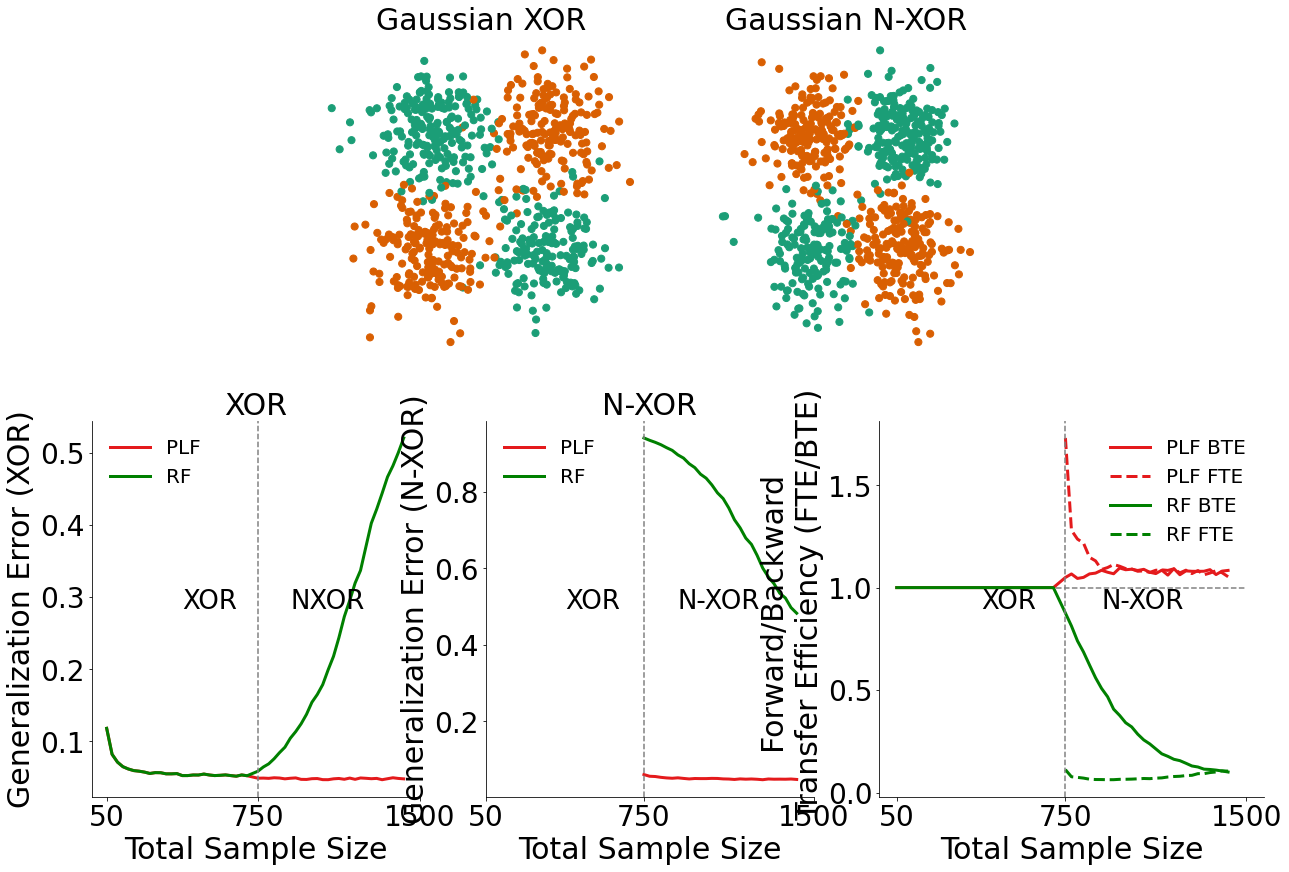

In [9]:
# plot
fn.plot_error_and_eff(n_xor, n_nxor, mean_error, mean_te, 'XOR', 'NXOR')

Left: when N-XOR data is introduced, generalization error of classifying XOR datarandom forest increases exponentially while progressive learning decreases gradually.

Middle: plot not visible before introduction of XOR but introduction of XOR data causes generalization error of random forest to decrease, but progressive learning forests still better.

Right: Progressive learning has positive forward and backward transfer.